# Project 3 - Part 2 - Solution - EDA

> Quick EDA for checking overview of movie data extracted from TMDB api.


- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
    - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
- How many movies are there in each of the certification categories (G/PG/PG-13/R)?
- What is the average revenue per certification category?
- What is the average budget per certification category

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

plt.style.use('fivethirtyeight')
sns.set_context('talk')

pd.set_option('display.max_columns',100)

In [106]:
# plt.rcParams['figure.facecolor']

> **NOTE: CHANGE `FOLDER` BACK TO DATA ONCE THE NEW DATA ONCE NEW API CALLS HAVE BEEN COMPLETED.

In [28]:
FOLDER = "Data-Previous/tmdb/"
sorted(os.listdir(FOLDER))

['combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz']

In [29]:
## Should show students glob
import glob
q  = f"{FOLDER}final*.csv.gz"
files = sorted(glob.glob(q))
files

['Data-Previous/tmdb/final_tmdb_data_2000.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2001.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2002.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2003.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2004.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2005.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2006.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2007.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2008.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2009.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2010.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2011.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2012.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2013.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2014.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2015.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2016.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2017.csv.gz',
 'Data-Previous/tmdb/final_tmdb_data_2018.csv.gz',
 'Data-Previous/tmdb/final_tmdb

## Concatenating DataFrames

In [30]:
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in files] )
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,A son tries to save his mother's eyesight by d...,0.840,/miPUS4bMvooEWUpq8kbC0j7oCie.jpg,"[{'id': 154995, 'logo_path': None, 'name': 'AS...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2021-09-08,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
3529,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,A college freshman confronts her parents’ valu...,3.665,/2cUczTzLq1F99Pgiw6BWFsKnD7J.jpg,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-11-19,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
3530,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,When a mysterious animal attack leaves a mutil...,421.143,/kvhrltQIRp1u84ao9uj52YPaWNY.jpg,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-01-21,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,NaN
3531,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,"Ex-con turned ""scrapper"" Jake leads a quiet li...",3.416,/ydnOAvlBzdqMyBRBXyQpReSzxrH.jpg,"[{'id': 91999, 'logo_path': None, 'name': 'Luc..

In [31]:
## drop placeholder imdb ids of 0
df = df.loc[ df['imdb_id']!='0']
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
5,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.889,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,A son tries to save his mother's eyesight by d...,0.840,/miPUS4bMvooEWUpq8kbC0j7oCie.jpg,"[{'id': 154995, 'logo_path': None, 'name': 'AS...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2021-09-08,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
3529,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,A college freshman confronts her parents’ valu...,3.665,/2cUczTzLq1F99Pgiw6BWFsKnD7J.jpg,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-11-19,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
3530,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,When a mysterious animal attack leaves a mutil...,421.143,/kvhrltQIRp1u84ao9uj52YPaWNY.jpg,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-01-21,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'..

In [32]:
## Saving combined data 
fname =FOLDER+'combined_tmdb_api_data.csv.gz'
df.to_csv(fname,compression='gzip',index=False)
df = pd.read_csv(fname, lineterminator='\n')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60130 entries, 0 to 60129
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60130 non-null  object 
 1   adult                  60130 non-null  float64
 2   backdrop_path          36994 non-null  object 
 3   belongs_to_collection  3738 non-null   object 
 4   budget                 60130 non-null  float64
 5   genres                 60130 non-null  object 
 6   homepage               14776 non-null  object 
 7   id                     60130 non-null  float64
 8   original_language      60130 non-null  object 
 9   original_title         60130 non-null  object 
 10  overview               58761 non-null  object 
 11  popularity             60130 non-null  float64
 12  poster_path            54382 non-null  object 
 13  production_companies   60130 non-null  object 
 14  production_countries   60130 non-null  object 
 15  re

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
4,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.889,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R


## Q1: How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [33]:
## save separeate filters for movie with budget/revenue >0 
filter_budget = df['budget'] > 0
filter_revenue = df['revenue']>0


## print value counts of filters
print('- Movies with >0 for budget:')
display(filter_budget.value_counts())

print('- Movies with >0 for revenue:')
display(filter_revenue.value_counts())

- Movies with >0 for budget:


False    49073
True     11057
Name: budget, dtype: int64

- Movies with >0 for revenue:


False    52693
True      7437
Name: revenue, dtype: int64

In [34]:
## compare using and vs or for filtering financials 
filter_and = filter_budget & filter_revenue
print('- If use AND for final filter:')
display(filter_and.value_counts())

filter_or = filter_budget | filter_revenue
print('- If use OR for final filter:')
display(filter_or.value_counts())

- If use AND for final filter:


False    55040
True      5090
dtype: int64

- If use OR for final filter:


False    46726
True     13404
dtype: int64

In [35]:
## Using filter_or
filter_financial = filter_or
filter_financial.value_counts()

False    46726
True     13404
dtype: int64

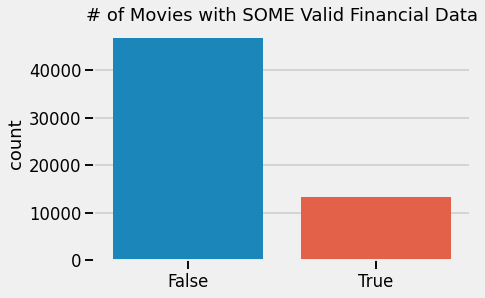

In [36]:
ax = sns.countplot(x=filter_financial)
ax.set_title('# of Movies with SOME Valid Financial Data');

>- There are 13,404 movies with financial data (either >0 for revenue OR budget)

In [37]:
## Using only filtered financial movies for remaining EDA
plot_df = df[filter_financial].copy()
plot_df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
5,tt0119273,0.0,/fClJrAmJQ90zg9gWnfHVYSMiDTv.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,Upon discovery of a shard of what could be the...,15.336,/mzOgKYOXiuwE5DIfagFs34bOb3J.jpg,"[{'id': 2216, 'logo_path': None, 'name': 'Helk...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2000-04-19,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.1,149.0,R
9,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,A film poem inspired by the Peruvian poet Césa...,7.865,/heW06kNneH6nL59h4ZoaODYXFmY.jpg,"[{'id': 157, 'logo_path': None, 'name': 'SVT D...","[{'iso_3166_1': 'SE', 'name': 'Sweden'}, {'iso...",2000-10-06,80334.0,98.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.2,205.0,NaN
10,tt0120467,0.0,NaN,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,Vulgar is about a man who is a children's clow...,5.300,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.5,40.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60094,tt9784798,0.0,/fatz1aegtBGh7KS0gipcsw9MqUn.jpg,NaN,26000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",https://www.judasandtheblackmessiah.com,583406.0,en,Judas and the Black Messiah,Bill O'Neal infiltrates the Black Panthers on ...,16.946,/iIgr75GoqFxe1X5Wz9siOODGe9u.jpg,"[{'id': 79426, 'logo_path': '/8aEC7xem9YwHNCDo...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2021-02-12,6416063.0,126.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can kill a revolutionary but you can't kil...,Judas and the Black Messiah,0.0,7.4,1011.0,NaN
60106,tt9844322,0.0,/AsKrGC7Y5J5k4BFbY9Upp09vJsH.jpg,NaN,17516235.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,577242.0,fr,Kaamelott - Premier volet,"Following the end of the acclaimed tv series, ...",8.904,/4mcovnajaLoy7dbv5arykJjDFFC.jpg,"[{'id': 2902, 'logo_path': '/nSPZ1BNASeC2dxJKB...","[{'iso_3166_1': 'FR', 'name': 'France'}]",2021-07-21,19002036.0,120.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,Patience is better served with sauce,Kaamelott: The

## Q2: How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [38]:
df['certification'].value_counts()

R                                  6097
NR                                 3261
PG-13                              3224
PG                                 1432
G                                   442
NC-17                               156
Unrated                               5
-                                     1
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
R                                     1
PG-13                                 1
10                                    1
Name: certification, dtype: int64

In [39]:
## fixing inconsitent certifications


# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}

df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      45507
R         6098
NR        3270
PG-13     3225
PG        1432
G          442
NC-17      156
Name: certification, dtype: int64

In [40]:
## to order them (optional)
cert_order = ['G','PG','PG-13','R','NC-17','NR']

In [111]:
def annotate_bars(ax,fmt='.2f',size=15,xytext=(0,8),ha='center', va='center',
                  convert_millions=False):
    """Annotates bar values above each bar
    Adapted from: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
    
    Args:
        ax (matplotlib axes): ax containing patches to annotate (bars)
        fmt (str): string format code for number format. Default='.2f'
        size (int): text size in pts. Default=15
        xytest (tuple): Padding for annotations (in offset points). Default=(0,8)
        ha (str): horizontal alignment. Default is 'center'
        va (str): vertical alignment. Default is 'center'
        convert_millions(bool): Determines if values are calculated as Millions
    """

    # Iterrating over the bars one-by-one
    for bar in ax.patches:

      # Using Matplotlib's annotate function and
      # passing the coordinates where the annotation shall be done
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
        if convert_millions==False:
            value = format(bar.get_height(),fmt )
        else:
            raw_value = bar.get_height()/1_000_000
            value = format(raw_value,fmt)+ "M"
        ax.annotate(value,
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), 
                    ha=ha, va=va,
                       size=size, xytext=xytext,
                       textcoords='offset points')

        
def savefig(fname,fig=None, ax=None,dpi=300,bbox_inches='tight',
            facecolor='auto' ,verbose=True):
    if ((fig==None) & (ax==None)) |((fig!=None) & (ax!=None)) :
        raise Exception("Must provide EITHER fig or AX")
        
    if fig is None:
        fig = ax.get_figure()
    
    fig.savefig(fname,dpi=dpi,bbox_inches=bbox_inches,facecolor=facecolor )
    if verbose:
        print(f'- Figure saved as {fname}')
    

- Figure saved as Images/EDA_certification_counts.png


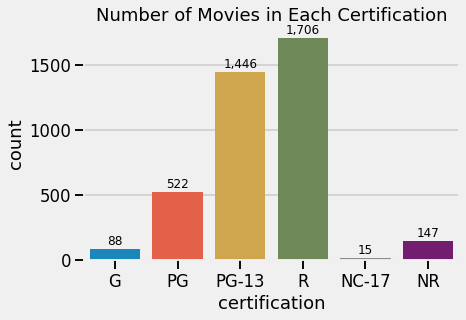

In [115]:
ax = sns.countplot(data=plot_df, x='certification',order=cert_order);
ax.set_title('Number of Movies in Each Certification')
annotate_bars(ax,fmt=',',size=12,convert_millions=False)
savefig('Images/EDA_certification_counts.png',ax=ax)

## Q3: What is the average revenue per certification category?

- Figure saved as Images/EDA_avg_revenue_certification.png


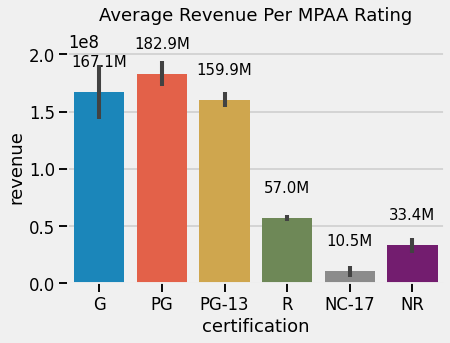

In [116]:
ax= sns.barplot(data=plot_df, x='certification',y='revenue', 
                order=cert_order,ci=68);
annotate_bars(ax, convert_millions=True,fmt='.1f',xytext=(0,30))
ax.set_title('Average Revenue Per MPAA Rating',y=1.1);
savefig('Images/EDA_avg_revenue_certification.png',ax=ax)

## Q4: What is the average budget per certification category?

- Figure saved as Images/EDA_avg_budget_certification.png


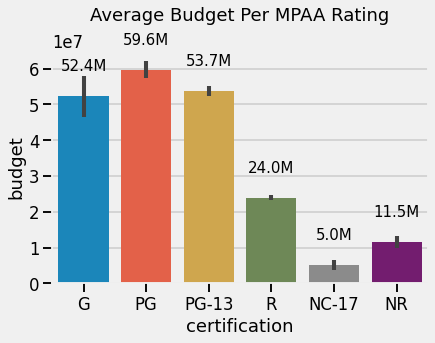

In [118]:
ax= sns.barplot(data=plot_df, x='certification',y='budget', 
                order=cert_order,ci=68);
annotate_bars(ax, convert_millions=True,fmt='.1f',xytext=(0,30))
ax.set_title('Average Budget Per MPAA Rating',y=1.1);
savefig('Images/EDA_avg_budget_certification.png',ax=ax)

## Q5: What is the average ROI (%) for Movies with All Financial Data?

In [119]:
## Save plot_df with movies that had buget AND revnue
plot_df = df[filter_and].copy()
## calculate ROI
plot_df['ROI (%)'] = (df['revenue']- df['budget'])/df['budget'] *100

plot_df.info()
plot_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5090 entries, 3 to 60107
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                5090 non-null   object 
 1   adult                  5090 non-null   float64
 2   backdrop_path          4867 non-null   object 
 3   belongs_to_collection  1118 non-null   object 
 4   budget                 5090 non-null   float64
 5   genres                 5090 non-null   object 
 6   homepage               2416 non-null   object 
 7   id                     5090 non-null   float64
 8   original_language      5090 non-null   object 
 9   original_title         5090 non-null   object 
 10  overview               5082 non-null   object 
 11  popularity             5090 non-null   float64
 12  poster_path            5053 non-null   object 
 13  production_companies   5090 non-null   object 
 14  production_countries   5090 non-null   object 
 15  rel

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,ROI (%)
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG,8469.968667
10,tt0120467,0.0,NaN,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,Vulgar is about a man who is a children's clow...,5.300,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.5,40.0,R,-87.580000
12,tt0120630,0.0,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,Having been hopelessly repressed and facing ev...,51.339,/8XgmIsbpVamdhwcNVsYzohFZTtT.jpg,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.7,3997.0,G,399.632364
15,tt0120753,0.0,/cXXxi0j9sXFt7LbeajuFoKFqWMu.jpg,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,8.371,/7AjzGYybwfndxnpApKXahQiq2Zy.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.9,247.0,R,-98.675213
16,tt0120755,0.0,/8XaohdSqoBEWHhW40q2VTdMBrV0.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,26.731,/2njB2A85Ni7bRR7vIOrfv6TBPeC.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2000-05-24,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.1,5279.0,PG-13,337.110484


In [120]:
## remove NR from cert-order for ROI
cert_order_roi = cert_order[:-1]
cert_order_roi

['G', 'PG', 'PG-13', 'R', 'NC-17']

- Figure saved as Images/EDA_avg_roi_certification.png


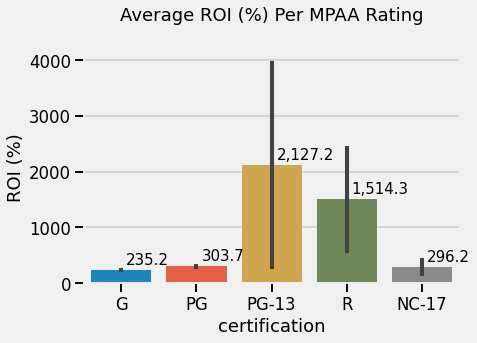

In [121]:
ax= sns.barplot(data=plot_df, x='certification',y='ROI (%)', 
                order=cert_order_roi,ci=68);
annotate_bars(ax, convert_millions=False,ha='left',xytext=(5,10),fmt=',.1f')
ax.set_title('Average ROI (%) Per MPAA Rating',y=1.1);
savefig('Images/EDA_avg_roi_certification.png',ax=ax)

# Summary

- According to initial EDA, R movies are more common, but generate less revenue. However, in terms of ROI, they are almost as successful as PG-13 movies.